In [12]:
import numpy as np
import pandas as pd
df = pd.read_csv("train.csv")
df=df.drop('id',axis=1)
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            5407 non-null   float64
 1   BlastFurnaceSlag           5407 non-null   float64
 2   FlyAshComponent            5407 non-null   float64
 3   WaterComponent             5407 non-null   float64
 4   SuperplasticizerComponent  5407 non-null   float64
 5   CoarseAggregateComponent   5407 non-null   float64
 6   FineAggregateComponent     5407 non-null   float64
 7   AgeInDays                  5407 non-null   int64  
 8   Strength                   5407 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 380.3 KB


In [14]:
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

<Axes: >

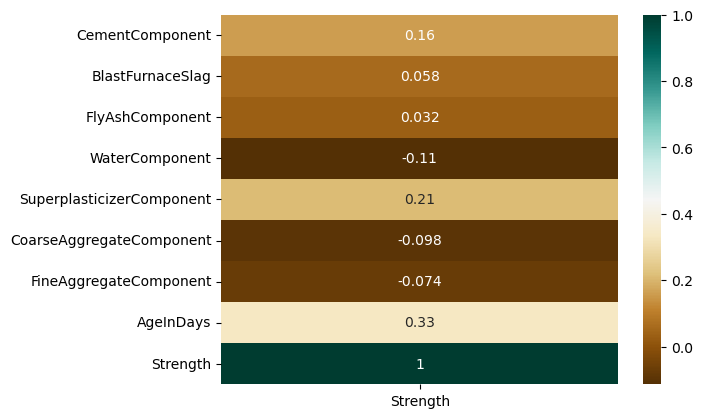

In [16]:
#import matplotlib inline
sns.heatmap(df.corr().tail(1).T,cmap="BrBG",annot=True)
###  ageindays is hoghly correated 

In [17]:
df['AgeInDays'].max()

365

In [18]:
len(df['FlyAshComponent'])

5407

In [19]:
len(df[df['SuperplasticizerComponent']==0]), len(df[df['FlyAshComponent']==0]),len(df[df['BlastFurnaceSlag']==0])

(3143, 3927, 3166)

In [20]:
(3166/5407)*100, 314333/5407,392700/5407

(58.55372665063806, 58.13445533567597, 72.6280747179582)

In [21]:
df.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [22]:
dt0 =df[['CementComponent','CoarseAggregateComponent','AgeInDays','Strength','BlastFurnaceSlag']]

In [23]:
dt0.head(10)

,CementComponent,CoarseAggregateComponent,AgeInDays,Strength,BlastFurnaceSlag
0,525.0,1125.0,3,10.38,0.0
1,143.0,967.0,28,23.52,169.0
2,289.0,1075.0,28,36.96,134.7
3,304.0,932.0,365,39.05,76.0
4,157.0,935.4,90,74.19,236.0
5,350.0,1055.0,7,37.43,0.0
6,135.7,1076.2,28,35.10,203.5
7,332.5,932.0,28,45.94,142.5
8,322.0,974.0,180,42.14,0.0
9,133.0,927.4,3,6.94,200.0


<Axes: >

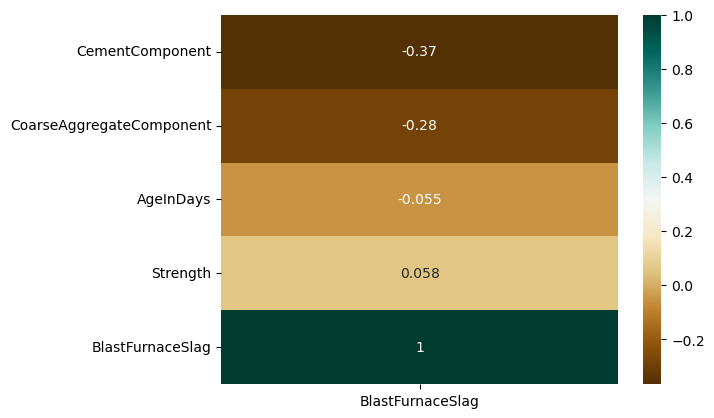

In [24]:

sns.heatmap(dt0.corr().tail(1).T,cmap="BrBG",annot=True)

In [25]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)


In [26]:
d1= imputer.fit_transform(dt0)
dt1=pd.DataFrame(d1,columns=dt0.columns)

In [27]:
dt1

,CementComponent,CoarseAggregateComponent,AgeInDays,Strength,BlastFurnaceSlag
0,525.0,1125.0,3.0,10.38,0.0
1,143.0,967.0,28.0,23.52,169.0
2,289.0,1075.0,28.0,36.96,134.7
3,304.0,932.0,365.0,39.05,76.0
4,157.0,935.4,90.0,74.19,236.0
...,...,...,...,...,...
5402,446.0,967.0,3.0,15.42,24.0
5403,350.0,974.0,180.0,49.20,0.0
5404,295.8,1076.2,28.0,39.30,0.0
5405,376.0,955.8,28.0,39.61,93.4


In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [29]:
imputer2= IterativeImputer(max_iter=20,missing_values=0.0,n_nearest_features=3)
dt2=imputer2.fit_transform(df)

/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [30]:
dt2= pd.DataFrame(dt2,columns=df.columns)

In [31]:
dt2

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,81.860184,74.522102,186.0,4.758320,1125.0,613.0,3.0,10.38
1,143.0,169.000000,143.000000,191.0,8.000000,967.0,643.0,28.0,23.52
2,289.0,134.700000,107.906032,185.7,6.067810,1075.0,795.3,28.0,36.96
3,304.0,76.000000,125.875883,228.0,1.995191,932.0,670.0,365.0,39.05
4,157.0,236.000000,132.871347,192.0,8.266520,935.4,781.2,90.0,74.19
...,...,...,...,...,...,...,...,...,...
5402,446.0,24.000000,79.000000,162.0,11.600000,967.0,712.0,3.0,15.42
5403,350.0,115.904228,110.404269,203.0,5.261638,974.0,775.0,180.0,49.20
5404,295.8,136.850101,106.984203,185.7,6.044926,1076.2,759.3,28.0,39.30
5405,376.0,93.400000,101.209226,162.6,11.500000,955.8,662.9,28.0,39.61


In [32]:
len(dt2[dt2['SuperplasticizerComponent']==0]), len(dt2[dt2['FlyAshComponent']==0]),len(dt2[dt2['BlastFurnaceSlag']==0])

(0, 0, 0)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import set_config
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer

In [33]:
def outliers(data):
    for col in data.columns:
        q1 = np.quantile(data[columns],0.25)
        q3 = np.quantile(data[columns],0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - (iqr * 1.5)
        upper_bound = q3 + (iqr * 1.5)

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(dt2.drop('Strength',axis=1),dt2['Strength'],test_size=0.2,random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(xtrain)

In [37]:
xdata=pd.DataFrame(scaled_data,columns=xtrain.columns)

In [41]:
forest_model = RandomForestRegressor()
forest_model.fit(xdata,ytrain)
forest_scores = cross_val_score(forest_model, xdata, ytrain, scoring="neg_mean_squared_error", cv=10)
print(np.sqrt(-forest_scores))

[11.90632934 12.19477951 12.15681795 12.09435807 10.86781628 12.28626321
 11.54312539 11.79970534 12.92633418 11.82483747]


In [43]:
param_grid = [
    {"n_estimators": [10, 30, 60, 80], "max_features": [8, 12, 20]},
    {"bootstrap": [False], "n_estimators": [10, 30, 50], "max_features": [8, 12]}
]


In [44]:
grid_search = GridSearchCV(forest_model, param_grid, cv=5, scoring='neg_mean_squared_error',
                          return_train_score=True)

In [45]:
grid_search.fit(xdata, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 12, 20],
                          'n_estimators': [10, 30, 60, 80]},
                         {'bootstrap': [False], 'max_features': [8, 12],
                          'n_estimators': [10, 30, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 80}

In [47]:
model = grid_search.best_estimator_

In [48]:
pipeline = Pipeline([
    ("std_scaler", scaler),
    ("model", model)
])

NameError: name 'Pipeline' is not defined

In [ ]:
y_pred = pipeline.predict(xtest)


In [ ]:
mse = mean_squared_error(ytest, y_pred)
np.sqrt(mse)

In [42]:
svr = SVR()
svr.fit(xdata, ytrain)
svr_scores = cross_val_score(svr, xdata, ytrain, scoring="neg_mean_squared_error", cv=10)
print(np.sqrt(-svr_scores))

[13.6589937  14.07802861 13.93941983 13.93021181 13.55638874 13.8323785
 13.70096505 13.62729335 13.75864977 13.61060966]
